# Повторяю/Закрпеляю Pandas

In [1]:
import pandas as pd
import numpy as np

<b>Series</b>

In [3]:
data = pd.Series([3,5,2,3,5])
data

0    3
1    5
2    2
3    3
4    5
dtype: int64

In [4]:
data.values

array([3, 5, 2, 3, 5], dtype=int64)

In [8]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [10]:
data = pd.Series([3,5,2], index=['a','b','c'])
data

a    3
b    5
c    2
dtype: int64

In [11]:
data['c']

2

In [23]:
#Series из словаря python
population = {'Moscow':14000333,
              'Texas': 2663333,
              'New York': 754434,
              'Florida':234234}
popul_data = pd.Series(population)
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
dtype: int64

In [66]:
popul_data.keys()

Index(['Moscow', 'Texas', 'New York', 'Florida'], dtype='object')

In [68]:
list(popul_data.items())

[('Moscow', 14000333),
 ('Texas', 2663333),
 ('New York', 754434),
 ('Florida', 234234)]

In [24]:
#срез по Series!!!
popul_data[:'New York']

Moscow      14000333
Texas        2663333
New York      754434
dtype: int64

In [70]:
popul_data['SPB'] = 7600999
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
SPB          7600999
dtype: int64

Аргумент data может быть скаларным значением, которое будет повторено нужное количество раз для заоплнения заданного индекса:

In [22]:
pd.Series(5,index=['a','b','c'])

a    5
b    5
c    5
dtype: int64

<b>DataFrame</b>

In [25]:
#население
popul_data

Moscow      14000333
Texas        2663333
New York      754434
Florida       234234
dtype: int64

In [30]:
#площадь территории
area = pd.Series([243234,534345,23423,5434534], index=['Moscow','Texas','New York','Florida'])
area

Moscow       243234
Texas        534345
New York      23423
Florida     5434534
dtype: int64

df из словаря объектов series

In [71]:
#теперь создаем DataFrame, содержащий информацию о населении и площади
df = pd.DataFrame({'population':popul_data,
                  'area':area})
df

,population,area
Florida,234234,5434534.0
Moscow,14000333,243234.0
New York,754434,23423.0
SPB,7600999,NaN
Texas,2663333,534345.0


In [32]:
df.index

Index(['Moscow', 'Texas', 'New York', 'Florida'], dtype='object')

In [33]:
df.columns

Index(['population', 'area'], dtype='object')

df из одного объекта series

In [37]:
pd.DataFrame(popul_data, columns=['population'])

,population
Moscow,14000333
Texas,2663333
New York,754434
Florida,234234


df из списка словарей

In [39]:
pd.DataFrame({'a':i, 'b':2*i} for i in range(4))

,a,b
0,0,0
1,1,2
2,2,4
3,3,6


df из двумерного массива numpy

In [45]:
pd.DataFrame(np.random.rand(3, 2), columns=['foo','bar'], index=['a','b','c'])

,foo,bar
a,0.857709,0.739718
b,0.829598,0.993020
c,0.397513,0.026100


<b>Index</b>

In [47]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [50]:
#immutable type
ind[0] = 3

TypeError: Index does not support mutable operations

Index как упорядоченное множество

In [51]:
indA = pd.Index([1,3,5,7,9])
indB = pd.Index([2,3,5,7,11])

In [52]:
#пересечение
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [57]:
#объединение
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [63]:
#симметричная разность
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

<b>Индексаторы loc, illoc, ix</b>

In [72]:
data = pd.Series(['a','b','c'], index=[1,3,5])
data

1    a
3    b
5    c
dtype: object

In [73]:
data[1] #использование явного индекса

'a'

In [80]:
data[1:3] #использование НЕявных индексов

3    b
5    c
dtype: object

In [81]:
data.loc[1] #использование явного индекса

'a'

In [82]:
data.iloc[1] #использование НЕявного индекса

'b'

In [83]:
data.iloc[1:3] #использование НЕявных индексов

3    b
5    c
dtype: object

<b>Вернемся к DataFrame</b>

In [87]:
df

,population,area
Florida,234234,5434534.0
Moscow,14000333,243234.0
New York,754434,23423.0
SPB,7600999,NaN
Texas,2663333,534345.0


In [88]:
df['density'] = df['population'] / df['area']
df

,population,area,density
Florida,234234,5434534.0,0.043101
Moscow,14000333,243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [90]:
df.keys()

Index(['population', 'area', 'density'], dtype='object')

In [89]:
df.values

array([[2.34234000e+05, 5.43453400e+06, 4.31010276e-02],
       [1.40003330e+07, 2.43234000e+05, 5.75591118e+01],
       [7.54434000e+05, 2.34230000e+04, 3.22091107e+01],
       [7.60099900e+06,            nan,            nan],
       [2.66333300e+06, 5.34345000e+05, 4.98429479e+00]])

In [91]:
df.items()

<generator object DataFrame.iteritems at 0x00000235CA79F408>

In [101]:
list(df.items())

[('population', Florida       234234
Moscow      14000333
New York      754434
SPB          7600999
Texas        2663333
Name: population, dtype: int64), ('area', Florida     5434534.0
Moscow       243234.0
New York      23423.0
SPB               NaN
Texas        534345.0
Name: area, dtype: float64), ('density', Florida      0.043101
Moscow      57.559112
New York    32.209111
SPB               NaN
Texas        4.984295
Name: density, dtype: float64)]

In [102]:
df

,population,area,density
Florida,234234,5434534.0,0.043101
Moscow,14000333,243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [103]:
df.loc['New York','population']

754434

In [104]:
df.iloc[2,0]

754434

In [110]:
df.iloc[:2,:2] *= -1

In [111]:
df

,population,area,density
Florida,-234234,-5434534.0,0.043101
Moscow,-14000333,-243234.0,57.559112
New York,754434,23423.0,32.209111
SPB,7600999,NaN,NaN
Texas,2663333,534345.0,4.984295


In [116]:
df.loc[df.population < 1000000, ['population']]

,population
Florida,-234234
Moscow,-14000333
New York,754434


Заполним NaN

In [167]:
M = pd.DataFrame(np.random.randint(0,10,(3,3)), columns=list('ABC'))
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


In [168]:
M.stack()

0  A    6
   B    4
   C    7
1  A    9
   B    2
   C    5
2  A    0
   B    6
   C    6
dtype: int32

In [169]:
M.stack()[0]

A    6
B    4
C    7
dtype: int32

In [170]:
M.stack()[0].mean()

5.666666666666667

In [171]:
M.stack().mean()

5.0

In [172]:
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


In [173]:
B = pd.DataFrame(np.random.randint(0,10,(2,2)), columns=list('AB'))
B

,A,B
0,9,8
1,8,3


In [174]:
M + B

,A,B,C
0,15.0,12.0,NaN
1,17.0,5.0,NaN
2,NaN,NaN,NaN


In [175]:
fill = M.stack().mean() #создаем заливку для NaN

M.add(B, fill_value=fill) #заливаем

,A,B,C
0,15.0,12.0,12.0
1,17.0,5.0,10.0
2,5.0,11.0,11.0


In [176]:
M

,A,B,C
0,6,4,7
1,9,2,5
2,0,6,6


Вычитание по столбцам

In [177]:
M = M.subtract(M['A'], axis=0)
M

,A,B,C
0,0,-2,1
1,0,-7,-4
2,0,6,6


<b>Отсутствующие данные None и NaN. Их обработка</b>

In [178]:
vals1 = np.array([1,None,3,4])
vals1

array([1, None, 3, 4], dtype=object)

In [180]:
vals2 = np.array([1,np.nan,3,4])
vals2

array([ 1., nan,  3.,  4.])

NaN подобен вирусу: он заражает любой объект, с которым соприкасается так, что любая арифметическая операция станет равна NaN

In [181]:
1 + np.nan

nan

In [182]:
9 * np.nan

nan

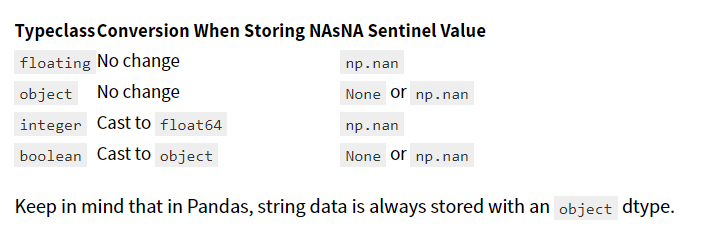

<b>Операции над пустыми значениями</b>

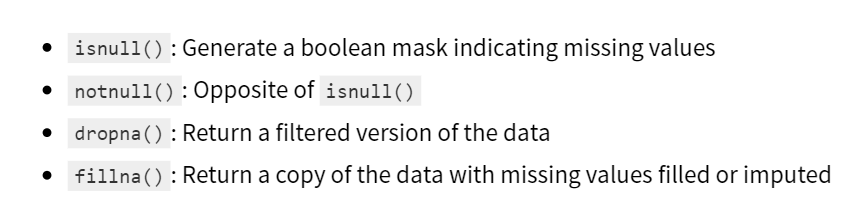

In [88]:
data = pd.Series([1, np.nan, 'hello', None])

In [89]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

Маскирование

In [90]:
data[data.notnull()]

0        1
2    hello
dtype: object

Удаление пустых значений

In [91]:
data.dropna()

0        1
2    hello
dtype: object

In [189]:
#For a DataFrame, there are more options
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [190]:
#By default, dropna() will drop all rows in which any null value is present
df.dropna()

,0,1,2
1,2.0,3.0,5


In [191]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [192]:
df.dropna(axis='columns', how='all') #если все значения в каком-либо столбце равны NaN

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [193]:
df.iloc[0,0] = np.nan
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [195]:
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [204]:
df.dropna(axis='rows', thresh=2) #оставляет только те строки, в которых хотя бы 2 значения non-null

,0,1,2
1,2.0,3.0,5
2,NaN,4.0,6


Заполнение пустых значений

In [205]:
df

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [207]:
df.fillna(0)

,0,1,2
0,0.0,0.0,2
1,2.0,3.0,5
2,0.0,4.0,6


In [210]:
df.fillna(method='ffill') #forward-fill
#следующее значение заполняется предыдущим. 
#если предыдущего значения не было - настоящее останется NaN

,0,1,2
0,NaN,NaN,2
1,2.0,3.0,5
2,2.0,4.0,6


In [211]:
df.fillna(method='bfill') #backward-fill

,0,1,2
0,2.0,3.0,2
1,2.0,3.0,5
2,NaN,4.0,6


<b>Конкатенация</b>

In [8]:
A = pd.DataFrame([[38,52,24],
                  [44,89,55]])
A

,0,1,2
0,38,52,24
1,44,89,55


In [9]:
B = pd.DataFrame([[77,74,55],
                  [99,44,21]])
B

,0,1,2
0,77,74,55
1,99,44,21


In [12]:
pd.concat([A,B]) #дублирование индексов!

,0,1,2
0,38,52,24
1,44,89,55
0,77,74,55
1,99,44,21


In [14]:
pd.concat([A,B],ignore_index=True) #выравнивани индексов!

,0,1,2
0,38,52,24
1,44,89,55
2,77,74,55
3,99,44,21


In [15]:
pd.concat([A,B],verify_integrity=True) #проверка на отсутсвие одинаковых индексов

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')

In [22]:
AA = pd.DataFrame([[38,52,24],
                  [44,89,55]])
AA

,0,1,2
0,38,52,24
1,44,89,55


In [26]:
BB = pd.DataFrame([[11,22,33],
                  [44,55,66]], columns=['A','B',1])
BB

,A,B,1
0,11,22,33
1,44,55,66


In [28]:
pd.concat([AA,BB]) #join='outer'

,0,1,2,A,B
0,38.0,52,24.0,NaN,NaN
1,44.0,89,55.0,NaN,NaN
0,NaN,33,NaN,11.0,22.0
1,NaN,66,NaN,44.0,55.0


In [29]:
pd.concat([AA,BB], join='inner') #join='inner'

,1
0,52
1,89
0,33
1,66


Рассмотрим метод <b>merge</b>

One-to-one

In [35]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [36]:
display?

In [40]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Many-to-one

In [41]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3, df4, pd.merge(df3, df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Many-to-many

In [42]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df1, df5, pd.merge(df1, df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


left_on/right_on если одна колонка называется по-разному в сливаемых таблицах

In [43]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1,df3, pd.merge(df1, df3, left_on="employee", right_on="name"))


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


Merge how

In [44]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display(df6,df7)

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


In [45]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [46]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [54]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [58]:
pd.merge(df6, df7, how='left').isnull().any()

name     False
food     False
drink     True
dtype: bool

In [48]:
pd.merge(df6, df7, how='right')

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


Пересекающиеся названия столбцов

In [49]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})

In [51]:
#тут одинаковое название RANK и RANK 
display(df8, df9, pd.merge(df8, df9, on="name"))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [52]:
#задаем названия столбцов
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display(df8, df9, pd.merge(df8, df9, on="name"))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [60]:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [67]:
df8

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


In [66]:
df8['name'].unique()

array(['Bob', 'Jake', 'Lisa', 'Sue'], dtype=object)

<b>Агрегирование и группировка</b>

In [92]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [93]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [94]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [95]:
planets['number'].unique()

array([1, 2, 3, 5, 4, 6, 7], dtype=int64)

In [96]:
planets.isnull().any()

method            False
number            False
orbital_period     True
mass               True
distance           True
year              False
dtype: bool

In [106]:
planets[planets['mass'].isnull() & planets['orbital_period'].isnull()].head()

,method,number,orbital_period,mass,distance,year
29,Imaging,1,NaN,NaN,45.52,2005
30,Imaging,1,NaN,NaN,165.00,2007
31,Imaging,1,NaN,NaN,140.00,2004
33,Imaging,1,NaN,NaN,NaN,2008
34,Imaging,1,NaN,NaN,145.00,2013


In [107]:
planets.mean()

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [108]:
planets['distance'].mean()

264.06928217821786

In [112]:
planets.mean(axis='rows')

number               1.785507
orbital_period    2002.917596
mass                 2.638161
distance           264.069282
year              2009.070531
dtype: float64

In [113]:
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [114]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


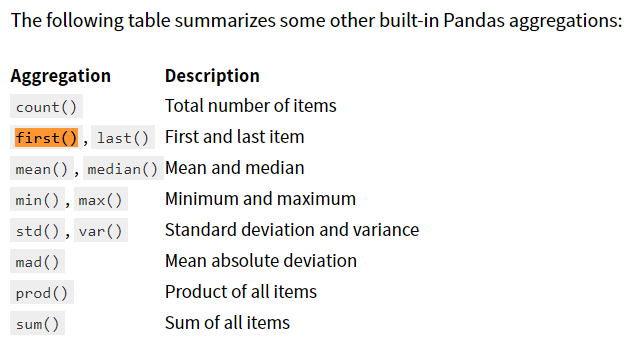

In [124]:
planets.groupby('year').mean()

,number,orbital_period,mass,distance
year,,,,
1989,1.000000,83.888000,11.680000,40.570000
1992,3.000000,45.901950,NaN,NaN
1994,3.000000,98.211400,NaN,NaN
1995,1.000000,4.230785,0.472000,15.360000
1996,2.500000,335.961656,1.979400,15.866667
1997,1.000000,39.845000,1.040000,17.430000
1998,2.200000,114.310661,2.687120,26.302000
1999,1.600000,552.280919,3.236643,30.947333
2000,1.687500,540.945323,3.633014,30.752500


In [131]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [140]:
planets.groupby('method').aggregate(['min','median'])

number        orbital_period                \
                                 min median            min        median   
method                                                                     
Astrometry                         1      1     246.360000    631.180000   
Eclipse Timing Variations          1      2    1916.250000   4343.500000   
Imaging                            1      1    4639.150000  27500.000000   
Microlensing                       1      1    1825.000000   3300.000000   
Orbital Brightness Modulation      1      2       0.240104      0.342887   
Pulsar Timing                      1      3       0.090706     66.541900   
Pulsation Timing Variations        1      1    1170.000000   1170.000000   
Radial Velocity                    1      1       0.736540    360.200000   
Transit                            1      1       0.355000      5.714932   
Transit Timing Variations          2      2      22.339500     57.011000   

                                 mass        distance            year          
                                  min median      min    median   min  median  
method                                                                         
Astrometry                        NaN    NaN    14.98    17.875  2010  2011.5  
Eclipse Timing Variations      4.2000  5.125   130.72   315.360  2008  2010.0  
Imaging                           NaN    NaN     7.69    40.395  2004  2009.0  
Microlensing                      NaN    NaN  1760.00  3840.000  2004  2010.0  
Orbital Brightness Modulation     NaN    NaN  1180.00  1180.000  2011  2011.0  
Pulsar Timing                     NaN    NaN  1200.00  1200.000  1992  1994.0  
Pulsation Timing Variations       NaN    NaN      NaN       NaN  2007  2007.0  
Radial Velocity                0.0036  1.260     1.35    40.445  1989  2009.0  
Transit                        1.4700  1.470    38.00   341.000  2002  2012.0  
Transit Timing Variations         NaN    NaN   339.00   855.000  2011  2012.5

In [141]:
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [146]:
planets['number'] = planets['number'].astype('float')

In [147]:
planets.dtypes

method             object
number            float64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

<b>Сводные таблицы вручную</b>

In [2]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
#без unstack()
titanic.groupby(['sex', 'class'])['survived'].aggregate(['mean'])

mean
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447

In [11]:
#с unstack() для раскрытия внутренней многомерности
titanic.groupby(['sex', 'class'])['survived'].aggregate(['mean']).unstack()

mean                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

Сводные таблицы pivot table

In [12]:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
#многоуровневая сводная таблица
#при помощи pd.cut для каждого пассажира определяем, к какому возрастному интервалу он относится
#pd.cut - bin values into discrete intervals
age = pd.cut(titanic['age'], [0, 18, 80])
age.head()

0    (18, 80]
1    (18, 80]
2    (18, 80]
3    (18, 80]
4    (18, 80]
Name: age, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [20]:
titanic.iloc[0].head()

survived       0
pclass         3
sex         male
age           22
sibsp          1
Name: 0, dtype: object

In [21]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

<b>Работа со строками в Pandas</b>

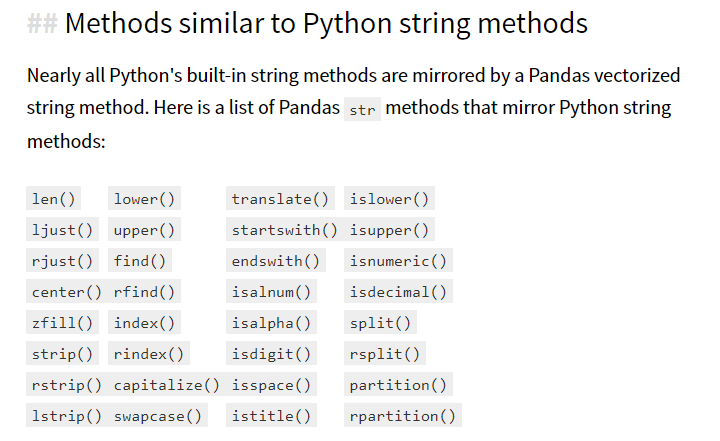

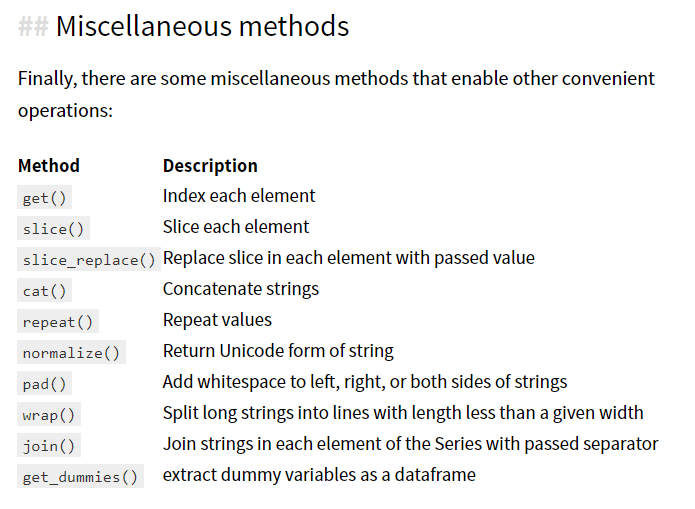

Get dummies method

In [22]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [28]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [32]:
new = full_monte['info'].str.get_dummies('|')
new

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


In [40]:
pd.merge(full_monte,new, left_index=True,right_index=True).drop(columns=['info'])

,name,A,B,C,D
0,Graham Chapman,0,1,1,1
1,John Cleese,0,1,0,1
2,Terry Gilliam,1,0,1,0
3,Eric Idle,0,1,0,1
4,Terry Jones,0,1,1,0
5,Michael Palin,0,1,1,1
